<a href="https://colab.research.google.com/github/Samoylowao/Portfolio/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%BE%D0%B2%D0%BE%D0%B9_%D1%84%D0%B8%D1%87%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('data_compare_feature.csv')

In [34]:
df.head(20)

,time,user_id,event,hotel_id,sum_usd,n_days
0,04:34:58,288941,open_hotel,37183566,NaN,NaN
1,04:34:58,288941,open_hotel,37183566,NaN,NaN
2,04:35:29,288941,open_hotel,37183566,NaN,NaN
3,04:35:30,288941,open_hotel,37183566,NaN,NaN
4,14:05:53,234057,open_hotel,21723277,NaN,NaN
5,14:08:22,234057,open_hotel,22716969,NaN,NaN
6,14:08:57,234057,open_hotel,22716969,NaN,NaN
7,14:10:02,234057,open_hotel,96668516,NaN,NaN
8,14:10:46,234057,open_hotel,93063821,NaN,NaN
9,14:10:58,234057,open_hotel,49446106,NaN,NaN


# *Распределение событий по типам*

In [35]:
event_counts = df['event'].value_counts()

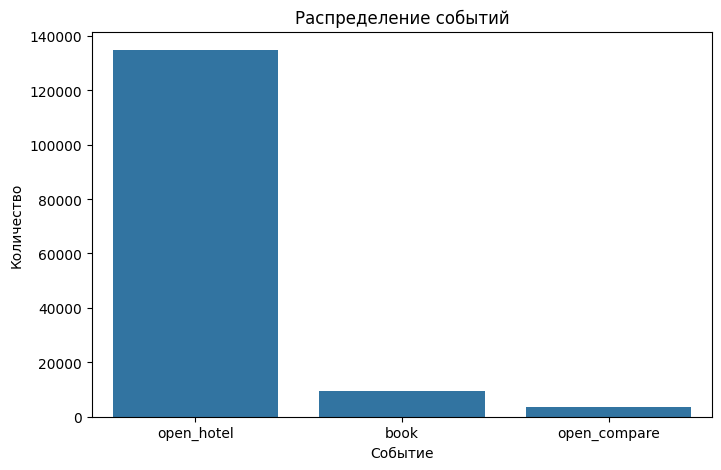

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title('Распределение событий')
plt.xlabel('Событие')
plt.ylabel('Количество')
plt.show()

**Вывод**: Низкий порог бронирования относительно общего количества людей,заходивших на сайт. Но при этом количество использовавших фичу клиентов почти половина от забронировавших, из чего можно предположить, что использование фичи подталкивает клиента к осуществлению бронирования.

# **Распределение сумм бронирования**

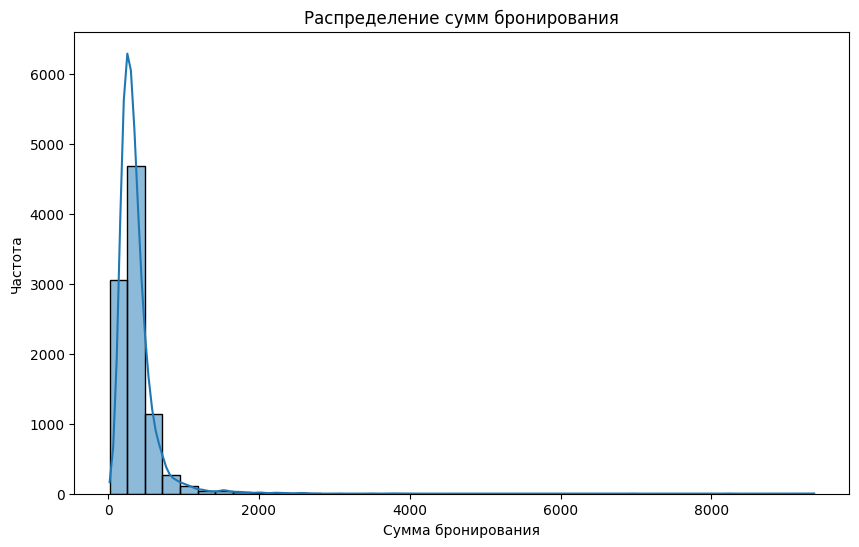

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['event']=='book']['sum_usd'], bins=40,kde=True)
plt.title('Распределение сумм бронирования')
plt.xlabel('Сумма бронирования')
plt.ylabel('Частота')
plt.show()

In [54]:
df['sum_usd'].median()

310.0

**Вывод:** Исходя из графика можно сделать вывод о большом количестве недорогих бронирований. Также можно сделать вывод о редких случаях бронирования высоких сумм бронирований или длительным периодам проживания. Из-за сильной правосторонней симметрии посмотрели медианное значение по суммам, чтобы оценить "типичную" сумму брования - 310 usd. Что подтверждает выводы о большом количестве недорогих брованирований.

# **Конверсия**

In [38]:
df['is_compare_used'] = df['event'] == 'open_compare'
df['is_booked'] = df['event'] == 'book'

In [39]:
user_data = df.groupby('user_id').agg({
    'is_compare_used': 'max',
    'is_booked': 'max',
    'sum_usd': 'sum'
})

In [40]:
conversion_rates = user_data.groupby('is_compare_used')['is_booked'].mean()
average_booking = user_data.groupby('is_compare_used')['sum_usd'].mean()

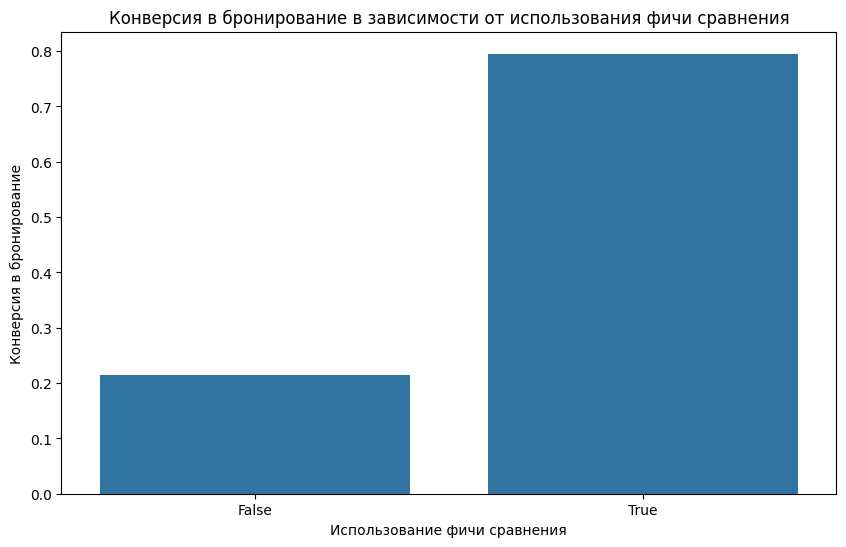

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
plt.title('Конверсия бронирования в зависимости от использования фичи сравнения')
plt.xlabel('Использование фичи сравнения')
plt.ylabel('Конверсия в бронирование')
plt.show()


Вывод: исходя из графиков можно предположить, что пользователи, которые использовали фичу сравнения с большей вероятностью завершали бронирование чем те кто не использовал.

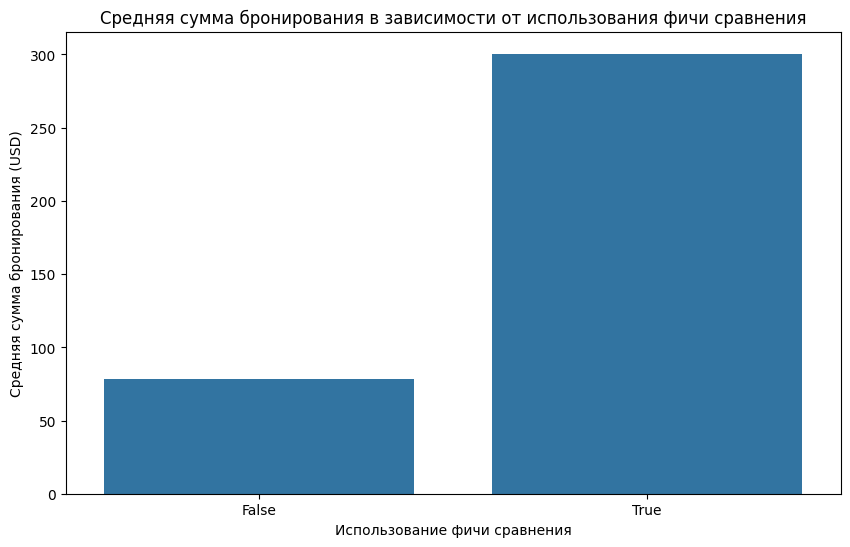

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_booking.index, y=average_booking.values)
plt.title('Средняя сумма бронирования в зависимости от использования фичи сравнения')
plt.xlabel('Использование фичи сравнения')
plt.ylabel('Средняя сумма бронирования (USD)')
plt.show()

**Вывод:** Можно предположить, что пользователи, которые использовали фичу бронируют на большую сумму чем те, кто ее не использовал. Учитывая, что медианная сумма брования 310. А здесь мы наблюдаем, что средняя сумма бронирования 300 для тех кто использовал фичу, можно говорить о положительном ее влиянии, учитывая общую тенденцию к суммам бронирования до 1000usd.

# **Построение воронки**

In [43]:
funnel_data = df.groupby('event').size().reindex(['open_hotel', 'open_compare', 'book'], fill_value=0)
funnel_data = funnel_data / funnel_data.iloc[0] * 100

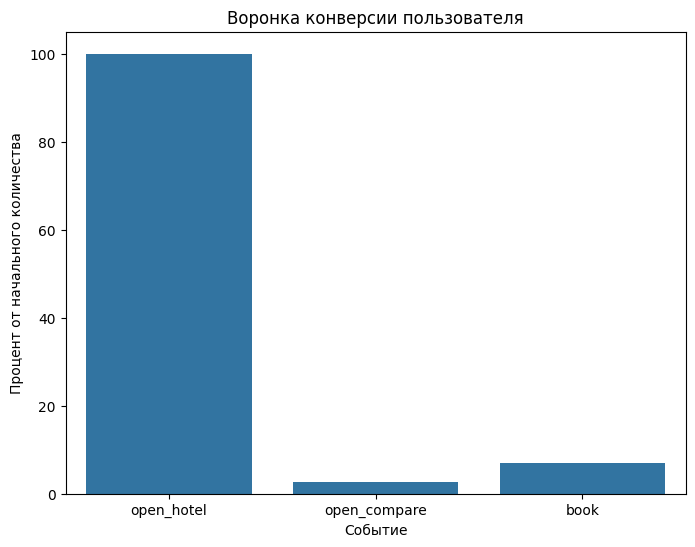

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(x=funnel_data.index, y=funnel_data.values)
plt.title('Воронка конверсии пользователя')
plt.xlabel('Событие')
plt.ylabel('Процент от начального количества')
plt.show()

Альтернативный вид воронки

In [45]:
from plotly import graph_objects as go
fig = go.Figure(go.Funnel(
    y=funnel_data.index,
    x=funnel_data.values,
    textposition="inside",
    textinfo="value+percent initial",
    opacity=0.8,
    marker=dict(color=["#0074D9", "#2ECC40", "#FFDC00", "#FF4136"])
))

fig.update_layout(title_text="Воронка конверсии пользователя")
fig.show()

**Вывод:**Всего 2.7% среди тех кто заходит на сайт используют ее, можно предположить о низкой осведомленности о наличии этой функции или неудобном расположении. Также можно заметить, что всего 7% от общего числа заходивших на сатй отеля в целом бронируют отель.


---


Рекомендации:


1.   проанализировать путь от просмотра отеля до бронирования
2.   Изучить момент осведомленности людей об этой функции, тестирование удобства ее использования



# **Время  бронирования для пользователей, использовавших сравнение


In [62]:
df[~df['n_days'].isna()]

,time,user_id,event,hotel_id,sum_usd,n_days,is_compare_used,is_booked,time_1
26,09:02:47,326317,book,34394571,363.0,4.0,False,True,0 days 09:02:47
33,10:26:16,465208,book,42071276,135.0,7.0,False,True,0 days 10:26:16
43,16:17:27,293626,book,19204433,588.0,2.0,False,True,0 days 16:17:27
50,14:10:22,932866,book,58941511,264.0,2.0,False,True,0 days 14:10:22
69,11:05:28,683421,book,49962953,325.0,7.0,False,True,0 days 11:05:28
...,...,...,...,...,...,...,...,...,...
147650,22:03:03,812221,book,70308122,438.0,5.0,False,True,0 days 22:03:03
147661,22:09:31,611417,book,38368565,286.0,6.0,False,True,0 days 22:09:31
147665,22:08:58,421292,book,72279080,219.0,6.0,False,True,0 days 22:08:58
147689,22:20:41,361482,book,31468597,303.0,2.0,False,True,0 days 22:20:41


In [74]:
df['n_days'].value_counts().to_frame().sort_values(by='count',ascending=False)

,count
n_days,
5.0,1649
6.0,1588
4.0,1574
7.0,1557
3.0,1552
2.0,1472


# **Общие выводы**



*   Пользователи, которые используют функцию сравнения имеют большую конверсию бронирования, чем те кто не используют функцию.
*   Пользователи, которые используют эту функцию также тратят больше, чем пользователи бронирующие без этой функции.
*   Низкая популярность фичи, только 2.7% пользователей используют ее, несмотря на ее влияние на конверсию и сумму бронирования.



---

# **Рекомендации**



*   Внедрение подсказок/Баннеров на сайте, чтобы пользователи были осведомлены о наличии такой функции.
*   Оптимизация пользовательского интерфейса. Возможно, стоит протестировать "путь пользователя", возможно, стоит сделать ее более интуитивно понятной пользователю.
*   Добавление новых возможностей в функцию, персонализированных предложений для пользователей.

Итог, функцию можно развивать.









